In [472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

%matplotlib inline

Read data

In [186]:
cal_raw = pd.read_csv('data/calendar.csv')
cal_raw.head()

,listing_id,date,available,price,metro_area
0,16228948,2018-03-25,t,"$3,000.00",LA
1,16228948,2018-03-24,t,"$3,000.00",LA
2,16228948,2018-03-23,t,"$3,000.00",LA
3,16228948,2018-03-22,t,"$3,000.00",LA
4,16228948,2018-03-21,t,"$3,000.00",LA


In [189]:
cal_raw['price'] = cal_raw['price'].str.replace('$', '')
cal_raw['price'] = cal_raw['price'].str.replace(',', '')
cal_raw['price'] = pd.to_numeric(cal_raw['price'])

In [190]:
cities = np.array(list(set(cal_raw['metro_area'])))
dates = np.array(list(set(cal_raw['date'])))

In [191]:
months = np.array(list(set([date[:7] for date in dates])))
months.sort()

In [198]:
cal_raw['month'] = [s[:7] for s in cal_raw['date']]

In [210]:
cal_bycity = {}
cal_bycity_cols = ['price_max', 'price_min', 'price_avg', 'price_std', 'price_range', 'book_ttl', 'book_filled', 'book_rate']
for city in cities:
    cal_subcity = cal_raw[cal_raw['metro_area']==city]
    cal_bycity[city] = pd.DataFrame(index=months, columns = cal_bycity_cols)
    for month in months:
        cal_subdate = cal_subcity[cal_subcity['month']==month]
        cal_bycity[city].loc[month,'price_max'] = np.max(cal_subdate['price'].dropna())      
        cal_bycity[city].loc[month,'price_min'] = np.min(cal_subdate['price'].dropna())
        cal_bycity[city].loc[month,'price_avg'] = np.mean(cal_subdate['price'].dropna())
        cal_bycity[city].loc[month,'price_std'] = np.std(cal_subdate['price'].dropna())
        cal_bycity[city].loc[month,'book_ttl'] = len(cal_subdate)
        cal_bycity[city].loc[month,'book_filled'] = len(cal_subdate[cal_subdate['available']=='f']) 
        if cal_bycity[city].loc[month,'book_ttl'] != 0:
            cal_bycity[city].loc[month,'book_rate'] = cal_bycity[city].loc[month,'book_filled']/cal_bycity[city].loc[month,'book_ttl']
        print (month)
    cal_bycity[city].loc[:,'price_range'] = cal_bycity[city]['price_max'] - cal_bycity[city]['price_min']
    print (city)

2015-10
2015-11
2015-12
2016-01
2016-02
2016-03
2016-04
2016-05
2016-06
2016-07
2016-08
2016-09
2016-10
2016-11
2016-12
2017-01
2017-02
2017-03
2017-04
2017-05
2017-06
2017-07
2017-08
2017-09
2017-10
2017-11
2017-12
2018-01
2018-02
2018-03
2018-04
2018-05
LA
2015-10
2015-11
2015-12
2016-01
2016-02
2016-03
2016-04
2016-05
2016-06
2016-07
2016-08
2016-09
2016-10
2016-11
2016-12
2017-01
2017-02
2017-03
2017-04
2017-05
2017-06
2017-07
2017-08
2017-09
2017-10
2017-11
2017-12
2018-01
2018-02
2018-03
2018-04
2018-05
santa_cruz
2015-10
2015-11
2015-12
2016-01
2016-02
2016-03
2016-04
2016-05
2016-06
2016-07
2016-08
2016-09
2016-10
2016-11
2016-12
2017-01
2017-02
2017-03
2017-04
2017-05
2017-06
2017-07
2017-08
2017-09
2017-10
2017-11
2017-12
2018-01
2018-02
2018-03
2018-04
2018-05
san_francisco
2015-10
2015-11
2015-12
2016-01
2016-02
2016-03
2016-04
2016-05
2016-06
2016-07
2016-08
2016-09
2016-10
2016-11
2016-12
2017-01
2017-02
2017-03
2017-04
2017-05
2017-06
2017-07
2017-08
2017-09
2017-10
2017

In [229]:
months

array(['2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05'], 
      dtype='<U7')

In [271]:
colors = ['#5cb85c','#d9534f','#428bca','#713E77','#562531','#414a12','#fc6917']

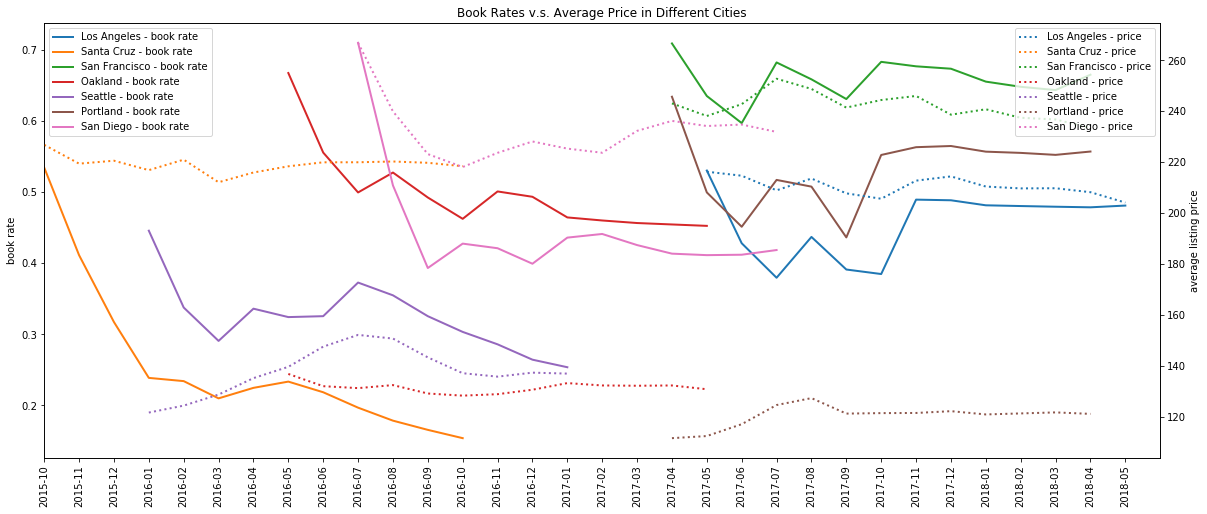

In [601]:
fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(111)

for i in range(len(cities)):
    city = cities[i]
    city_estate_match = cities_estate_match[i]
    ax.plot(range(len(cal_bycity[city])),cal_bycity[city]['book_rate'], label = city_estate_match+' - book rate', lw=2)

ax.set_xlim(0,length)
ax.set_xticks(range(length))
ax.set_xticklabels(months,rotation = 90)
ax.set_ylabel('book rate')
plt.legend(loc=2)

ax2 = ax.twinx()
for i in range(len(cities)):
    city = cities[i]
    city_estate_match = cities_estate_match[i]
    ax2.plot(range(len(cal_bycity[city])),cal_bycity[city]['price_avg'], ':', label = city_estate_match+' - price', lw=2)
ax2.set_xlim(0,length)
ax2.set_xticks(range(length))
ax2.set_ylabel('average listing price')
plt.legend()

plt.legend(loc=1)
plt.title('Book Rates v.s. Average Price in Different Cities')
plt.show()

In [242]:
for city in cities:
    cal_bycity[city].to_csv('data/bookrate_price_%s.csv'%city)

In [309]:
estate_raw = pd.read_csv('data/real_estate.csv')
estate_raw.head()

,type,zipcode,city,state,metro,county,size_rank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,ZHVI,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1137500,1137700,1152700,1156000.0,1140200,1130000,1131900,1149600,1198400,1247000
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318200,318100,318800,320200.0,320800,322000,323800,326100,327800,329100
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,401900,406000,414100,417800.0,417400,418400,414100,404100,406400,415500
3,ZHVI,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,113800,113900,114100,114500.0,114900,115000,114700,114700,114800,114700
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,198800,199200,200100,201500.0,203000,205100,206700,206500,206200,206700


In [331]:
cities_estate = np.array(list(set(estate_raw['city'])))
cities_estate.sort()

In [344]:
cities_estate_match = ['Los Angeles', 'Santa Cruz', 'San Francisco', 'Oakland', 'Seattle', 'Portland', 'San Diego']

In [384]:
estate_raw.columns[241:]

Index(['2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06'],
      dtype='object')

In [389]:
column_estate = list(estate_raw.columns[241:])
column_estate += ['city']
estate_raw_ZRI = estate_raw[estate_raw['type']=='ZRI'][column_estate]
estate_raw_ZHVI = estate_raw[estate_raw['type']=='ZHVI'][column_estate]

In [390]:
ZRI = pd.DataFrame(index = months, columns = cities_estate_match)
ZHVI = pd.DataFrame(index = months, columns = cities_estate_match)

In [398]:
for city in cities_estate_match:
    ZRI.loc[:,city] = np.sum(estate_raw_ZRI[estate_raw_ZRI['city']==city],axis=0)
    ZHVI.loc[:,city] = np.sum(estate_raw_ZHVI[estate_raw_ZHVI['city']==city],axis=0)

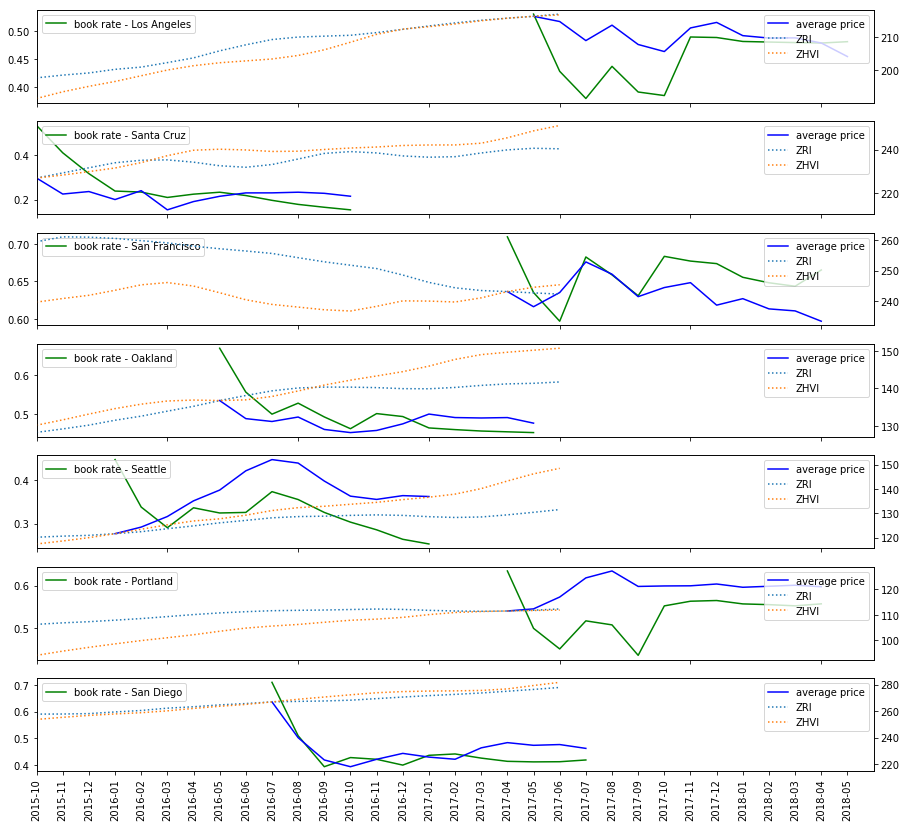

In [441]:
fig = plt.figure(figsize=(15,14))
length = len(cal_bycity[cities[0]])
for i in range(len(cities)):
    ax = fig.add_subplot(7,1,i+1)
    city = cities[i]
    city_estate_match = cities_estate_match[i]
    
    ax.plot(range(length), cal_bycity[city]['book_rate'], label = 'book rate - %s'%city_estate_match, color = 'g')    
    ax.set_xlim(0,length)
    ax.set_xticklabels([]) 
    plt.legend(loc=2)
    
    ax2 = ax.twinx()
    ax2.plot(range(length), cal_bycity[city]['price_avg'], label = 'average price', color = 'b')
    # normalize the Index score based on price at time 0
    first_nonzero_ix = cal_bycity[city]['price_avg'][cal_bycity[city]['price_avg']>0].index[0]
    y_norm_ZRI = cal_bycity[city].loc[first_nonzero_ix,'price_avg']/ZRI.loc[first_nonzero_ix,city_estate_match]
    y_norm_ZHVI = cal_bycity[city].loc[first_nonzero_ix,'price_avg']/ZHVI.loc[first_nonzero_ix,city_estate_match]
    ax2.plot(range(length), ZRI.loc[:,city_estate_match]*y_norm_ZRI,':', label = 'ZRI')
    ax2.plot(range(length), ZHVI.loc[:,city_estate_match]*y_norm_ZHVI,':', label = 'ZHVI')    
    ax2.set_xlim(0,length)
    plt.legend(loc=1)
    # plt.title('book rates v.s. average price in %s'%city)

ax.set_xticks(range(length))
ax.set_xticklabels(months,rotation = 90) 
plt.show()

In [583]:
def ols(city):
    y = np.array(cal_bycity[city]['price_avg'].dropna(), dtype='float')
    X = np.array(cal_bycity[city]['book_rate'].dropna(), dtype='float')
    X1 = sm.add_constant(X)
    model = sm.OLS(y, X1)
    fig = plt.figure()
    plt.scatter(X,y)
    plt.title(city)
    res = model.fit()
    return res, res.rsquared, res.pvalues[0], res.params[0], res.params[1]

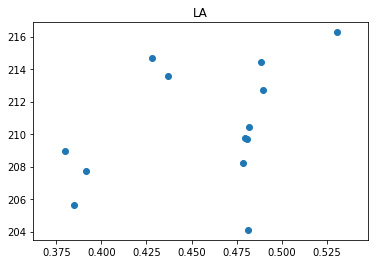

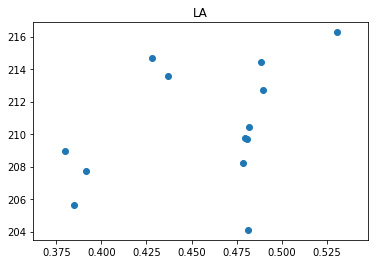

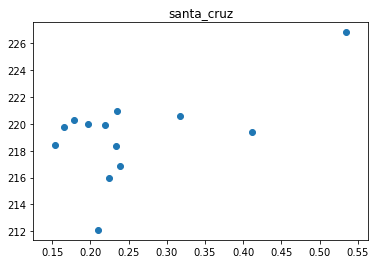

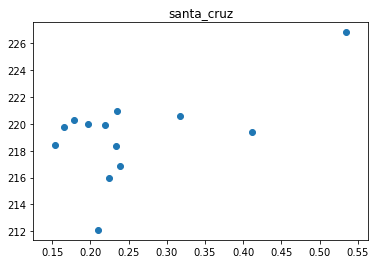

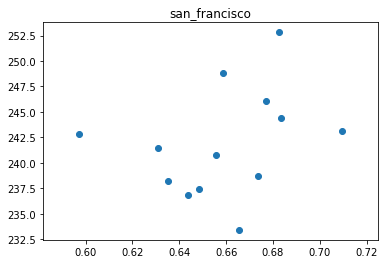

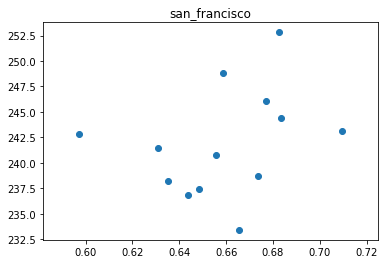

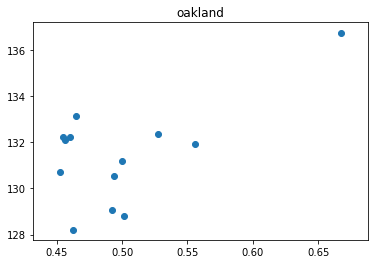

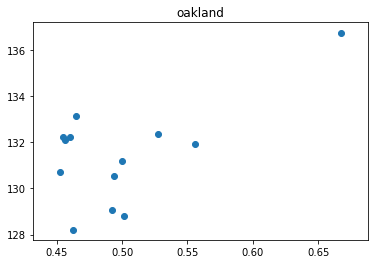

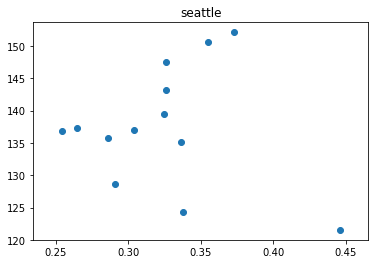

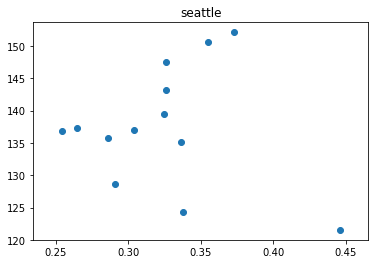

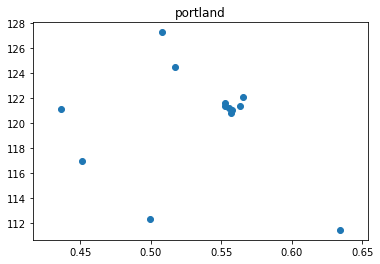

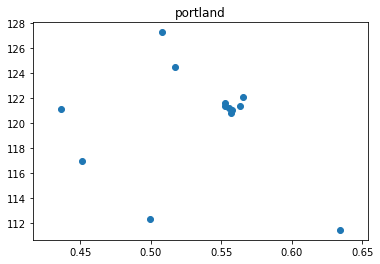

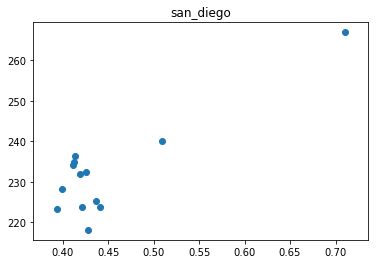

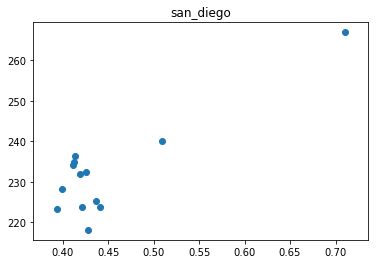

In [586]:
ols_res = pd.DataFrame(index = ['r-squared','pvalue','const','coef'], columns = cities_estate_match)
for i in range(len(cities_estate_match)):
    city_estate_match = cities_estate_match[i]
    city = cities[i]
    ols_res.loc[:,city_estate_match] = ols(city)[1:]
    r = ols(city)[0]

In [587]:
pd.options.display.float_format = '{:,.6f}'.format
ols_res

,Los Angeles,Santa Cruz,San Francisco,Oakland,Seattle,Portland,San Diego
r-squared,0.166086,0.353449,0.084545,0.374140,0.010693,0.032374,0.751304
pvalue,0.000000,0.000000,0.000110,0.000000,0.000008,0.000001,0.000000
const,196.066977,214.491201,206.414282,120.171052,143.903363,128.297118,175.787437
coef,31.568726,18.395249,53.889595,22.652756,-19.249578,-15.042029,125.979375


In [560]:
r.summary()

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     33.23
Date:                Sat, 09 Sep 2017   Prob (F-statistic):           0.000126
Time:                        13:51:45   Log-Likelihood:                 39.405
No. Observations:                  13   AIC:                            -74.81
Df Residuals:                      11   BIC:                            -73.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3516      0.020     17.683      0.000       0.308       0.395
x1             0.2520      0.044      5.765      0.000       0.156       0.348
==============================================================================
Omnibus:                        0.765   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.722
Skew:                          -0.389   Prob(JB):                        0.697
Kurtosis:                       2.147   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""